In [1]:
# only adjust settings in this cell
state = 'AR'
k = 4                 # the state has this number of districts
enumeration_limit = 10

In [2]:
filepath = 'C:\\districting-data-2020-reprojection\\'
filename = state + '_county.json'

from read import read_graph_from_json
G = read_graph_from_json( state, filepath + filename) 
k = G._k

In [3]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / k
print(f"When k = {k}, ideal_population = {round(ideal_population,2)}.")

When k = 4, ideal_population = 752881.0.


In [4]:
from optimization import iterative_refinement
from math import ceil, floor
import time

deviation = 1/2
max_deviation = 0.01 * ideal_population
plans = list()

while True:

    print("*****************************************")
    print(f"Trying deviation = {deviation}.")
    print("*****************************************")
    
    L = ceil( ideal_population - deviation )
    U = floor( ideal_population + deviation )

    start_time = time.perf_counter()
    plans += iterative_refinement(G, L, U, k, enumeration_limit=enumeration_limit, verbose=False)
    print("Total time =",round(time.perf_counter() - start_time,2))

    if deviation == max_deviation:
        break
    
    deviation *= 2
    deviation = min( deviation, max_deviation )
       

*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Total time = 12849.05
*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 11718.16
*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 12171.12
*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 8568.33
*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 6461.21
*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 4910.27
*****************************************
Trying deviation = 32.0.
*****************************************
Total time = 4651.31
*

***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[2.0, 150], [5.0, 134], [6.0, 132], [7.0, 120], [12.0, 118], [14.0, 114], [24.0, 108], [44.0, 106], [53.0, 100], [94.0, 98], [96.0, 96], [127.0, 94], [157.0, 92], [194.0, 90], [277.0, 82], [278.0, 80], [423.0, 76], [839.0, 74], [1127.0, 70], [1127.0, 70], [1597.0, 68], [2093.0, 66], [4022.0, 64]]


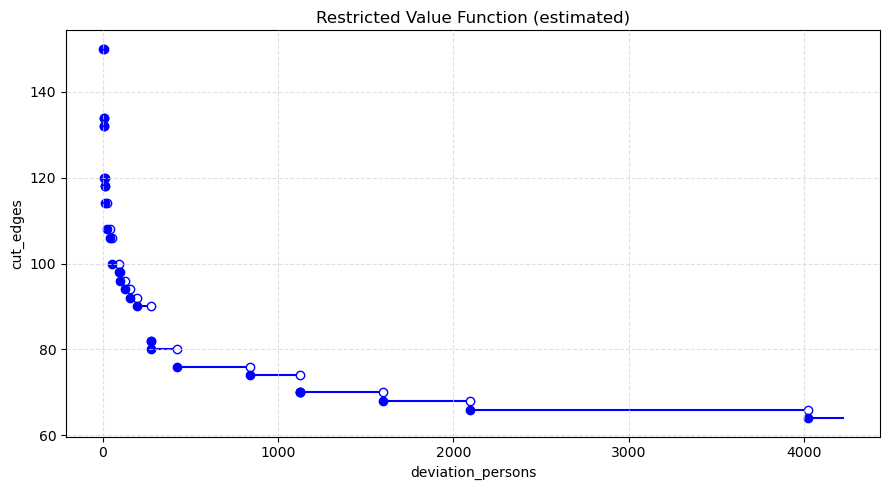

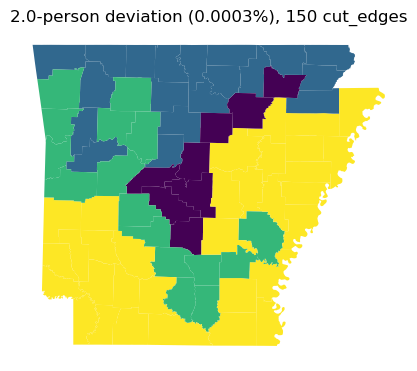

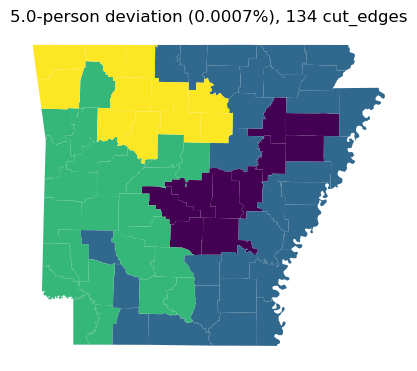

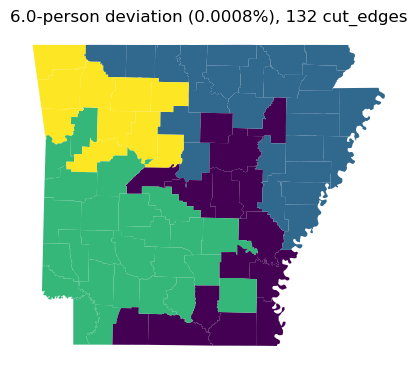

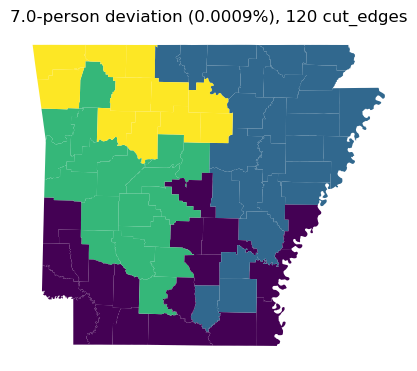

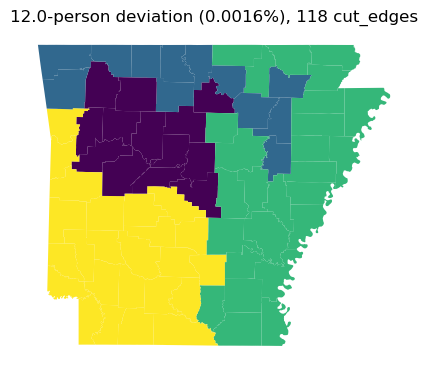

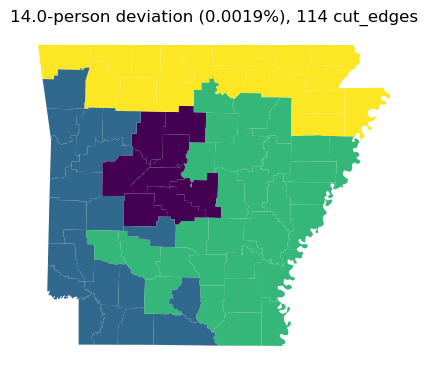

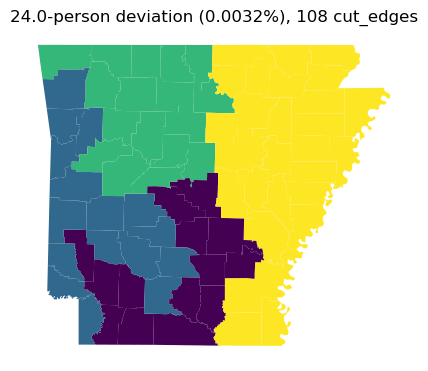

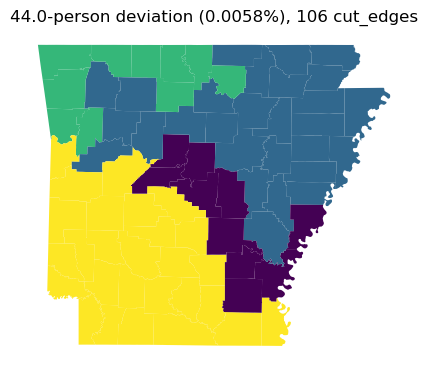

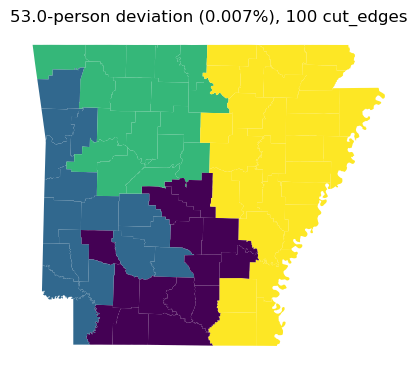

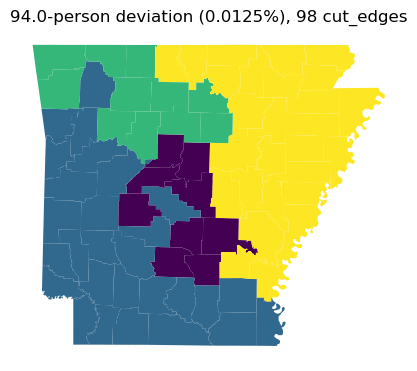

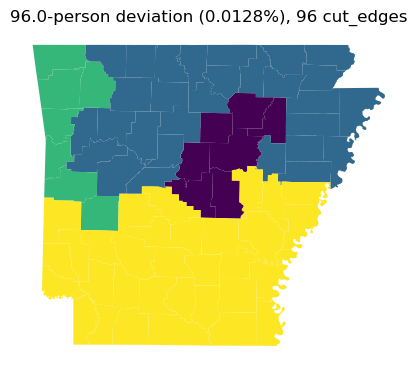

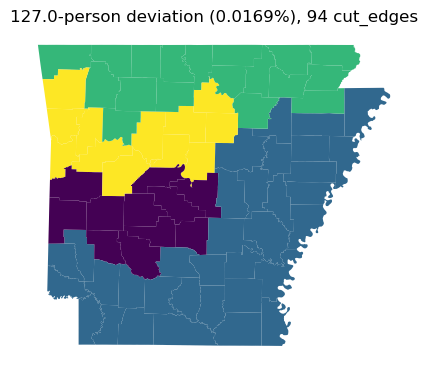

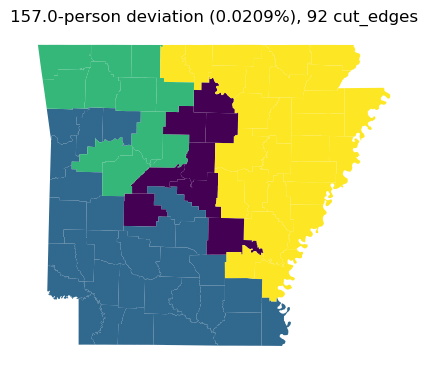

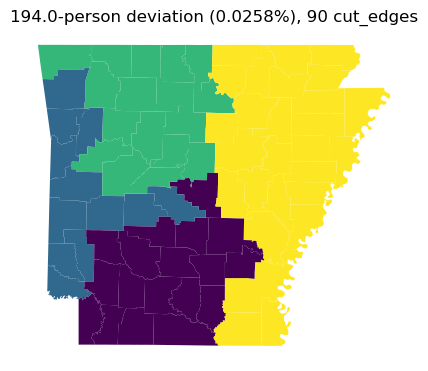

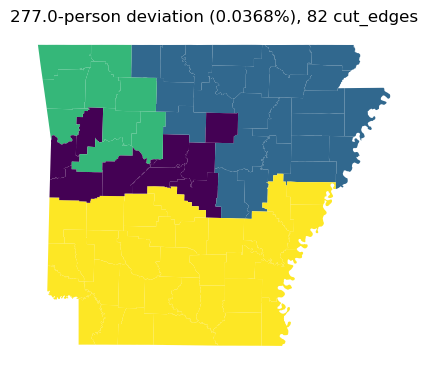

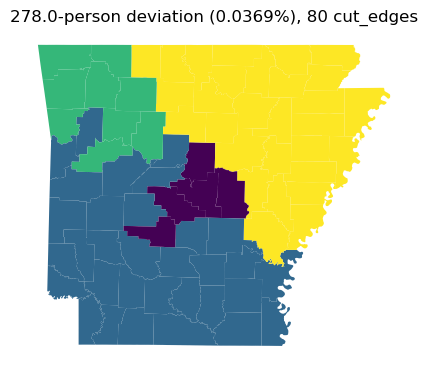

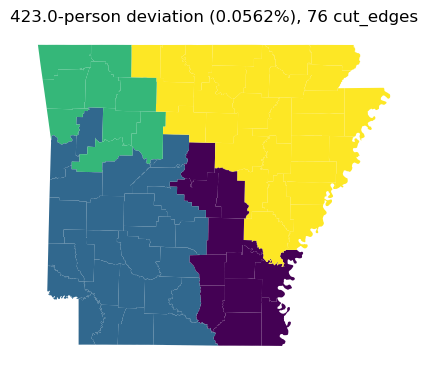

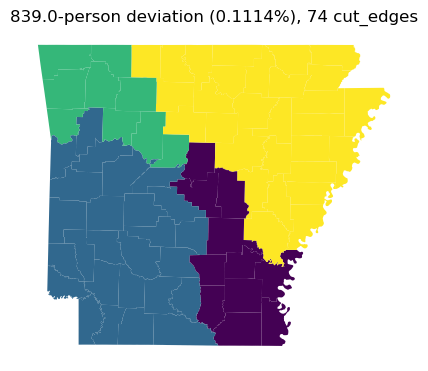

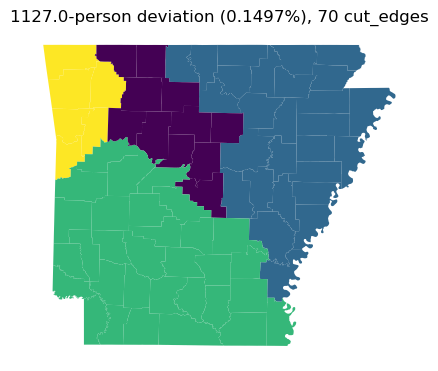

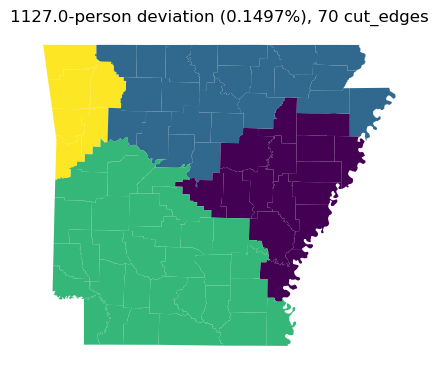

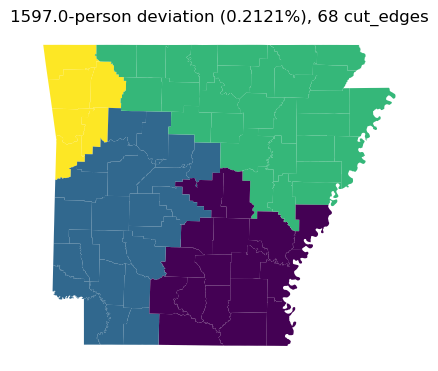

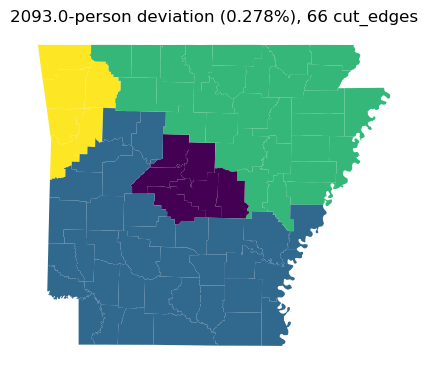

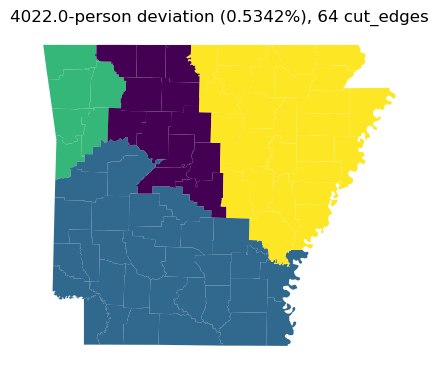

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[2.0, 81.03346264304145], [5.0, 76.56711538699153], [6.0, 75.30455652758901], [7.0, 74.05868187808878], [8.0, 73.85696585616498], [9.0, 68.92309627101655], [10.0, 68.44437748808798], [12.0, 63.25144865965447], [20.0, 62.487467950577795], [27.0, 61.59677213683463], [31.0, 60.595721571965626], [62.0, 60.501317379786514], [94.0, 60.45164103873164], [96.0, 54.5057325039747], [164.0, 54.37815723441305], [224.0, 53.61909803547828], [255.0, 53.38829457439942], [277.0, 52.390553916713884], [510.0, 51.93963275030082], [574.0, 51.114364440822], [835.0, 50.92736945177347], [1127.0, 47.89187216855379], [2093.0, 45.87739339335988], [4345.0, 45.27183118886377]]


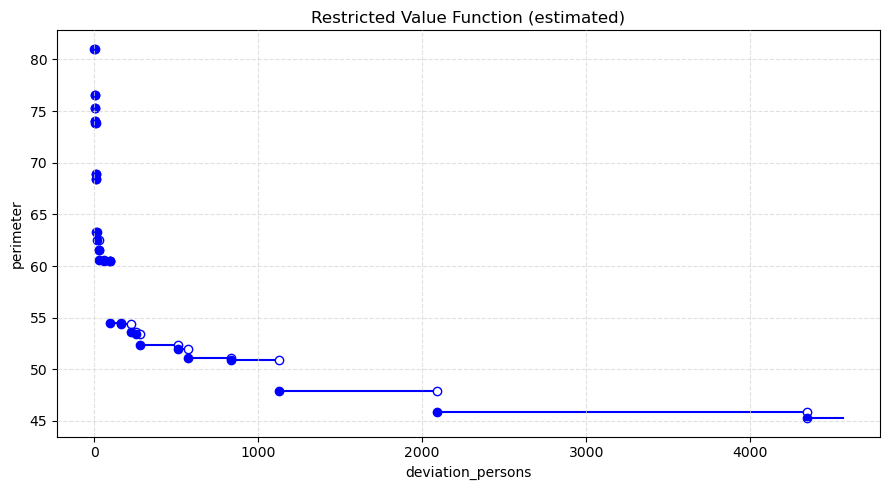

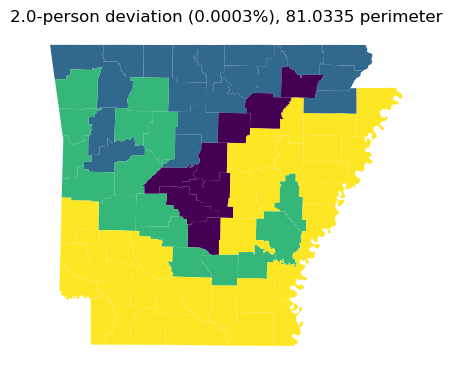

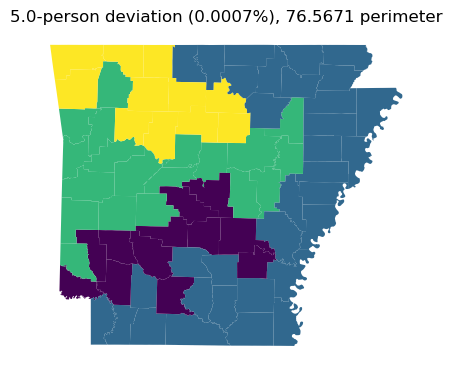

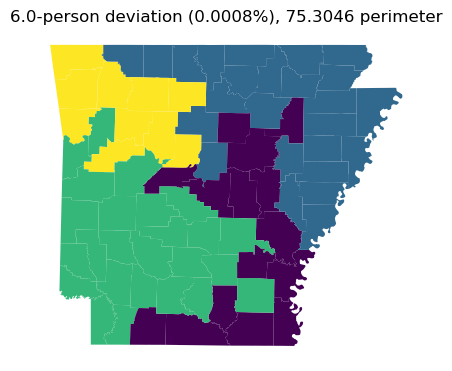

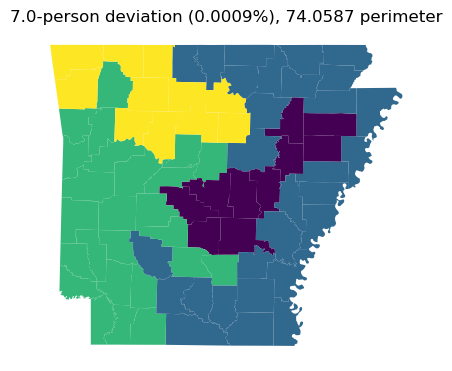

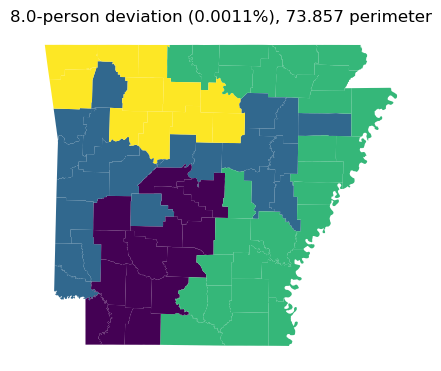

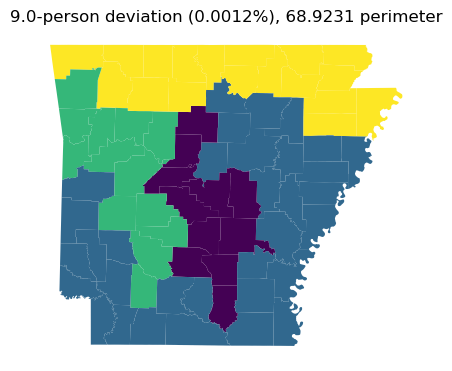

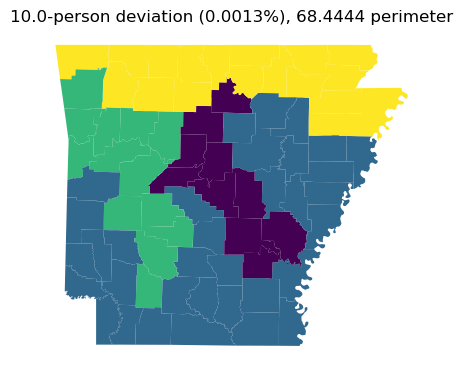

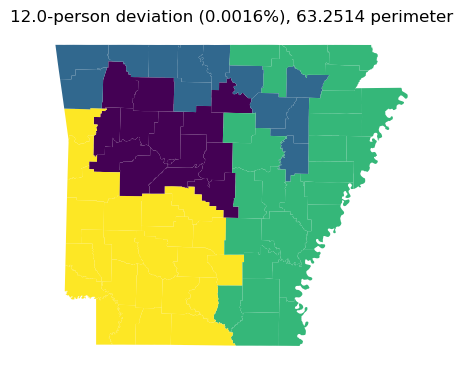

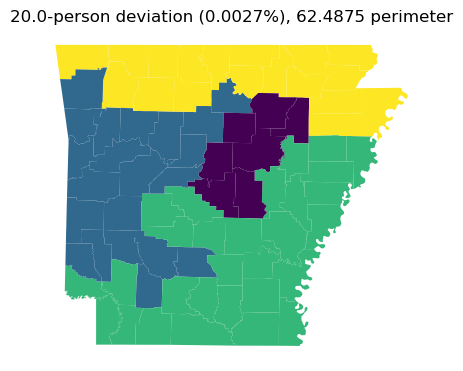

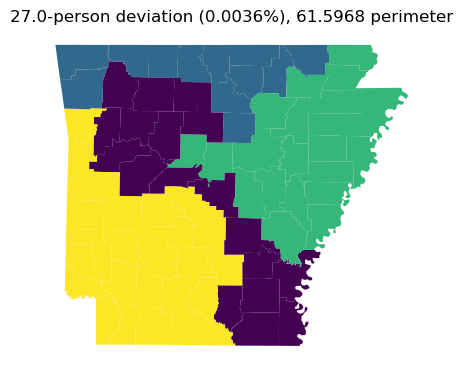

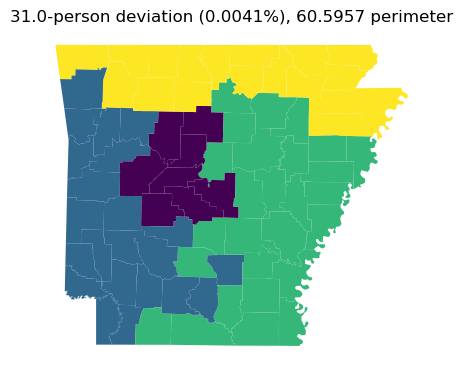

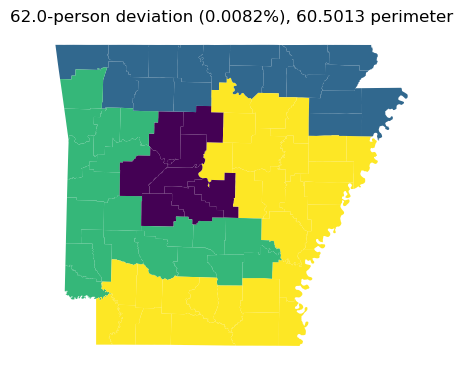

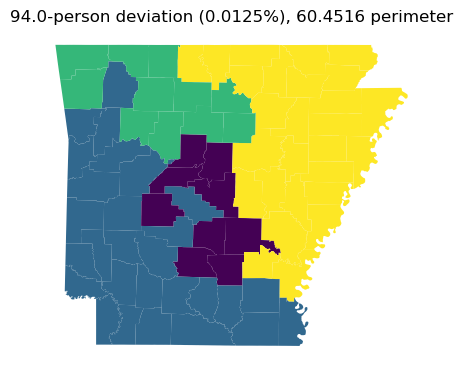

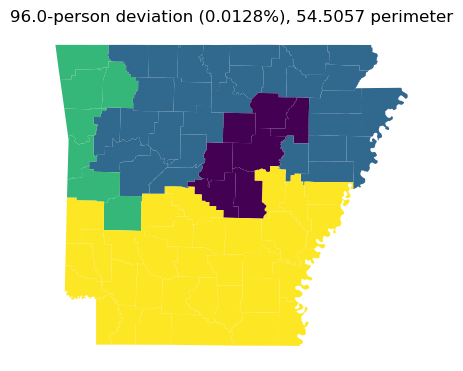

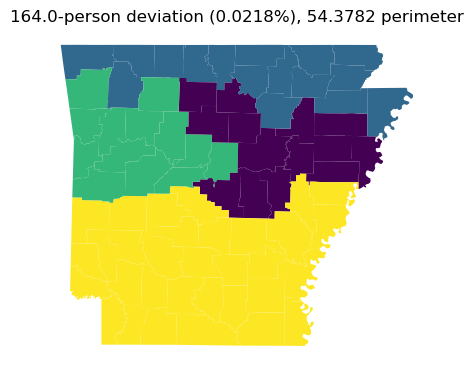

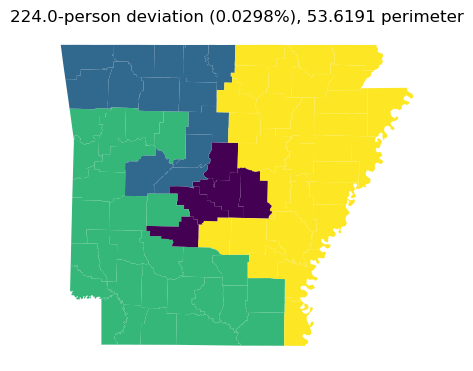

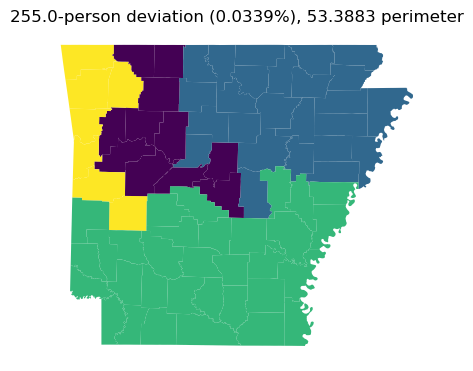

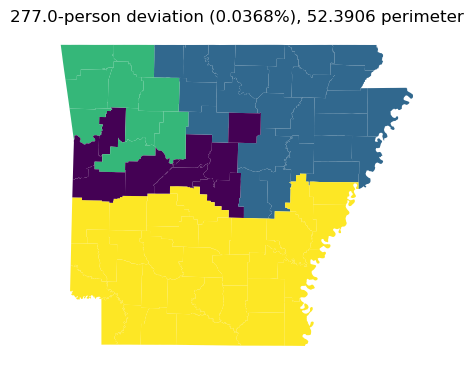

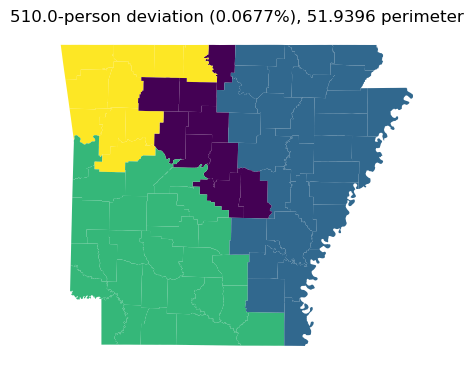

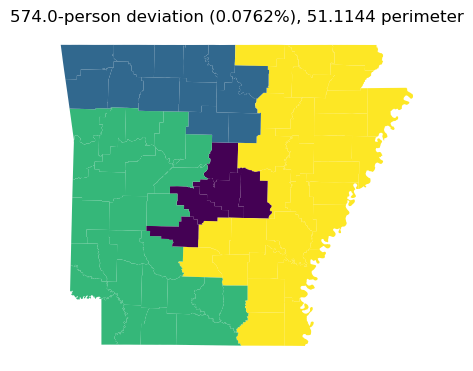

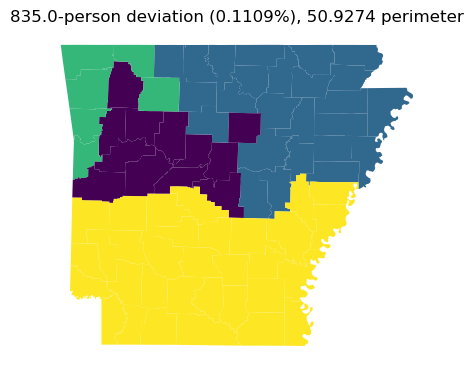

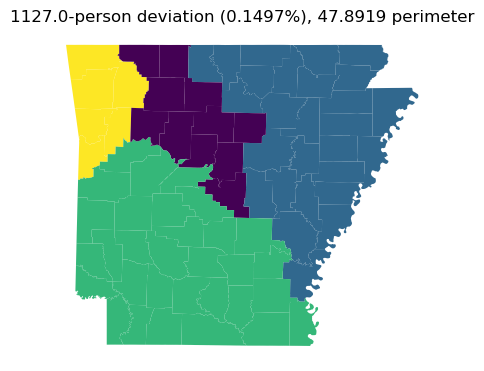

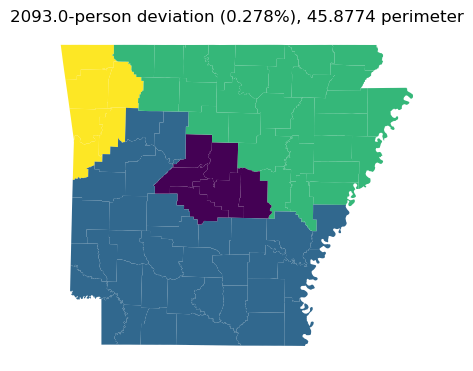

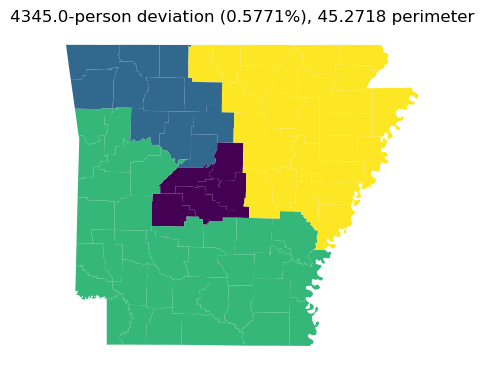

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[2.0, 9.752803719506689], [5.0, 8.700495417493418], [7.0, 8.10168149405013], [8.0, 7.921193579346756], [9.0, 6.957509001191855], [10.0, 6.84826759018905], [12.0, 5.9000484550783865], [20.0, 5.68192067393372], [31.0, 5.316777695991511], [62.0, 5.300704440079966], [96.0, 4.589635577758373], [224.0, 4.495555974651971], [255.0, 4.463664278849801], [384.0, 4.443743360602751], [389.0, 4.380736865806295], [413.0, 4.334810744073186], [423.0, 4.334491960652141], [487.0, 4.287189395236095], [510.0, 4.23266265726146], [574.0, 4.109989753419681], [622.0, 4.082461277457549], [945.0, 3.8650366939710947], [1127.0, 3.6017670671239803], [1357.0, 3.4981352235787635], [2093.0, 3.22506075358505], [4345.0, 3.1169820195560307], [6618.0, 3.113860461540436], [7373.0, 3.102086481847082]]


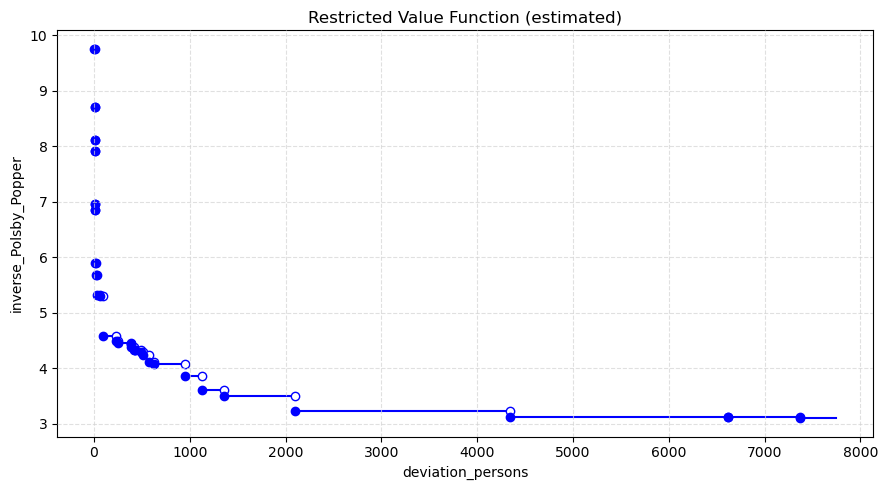

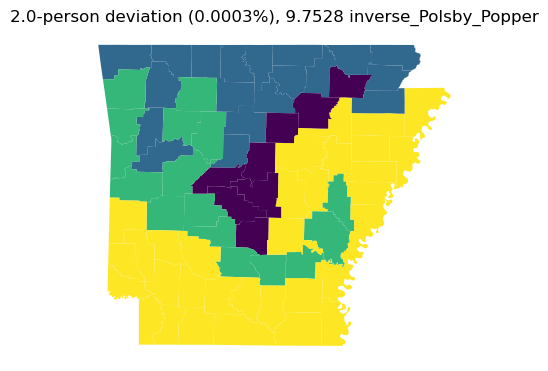

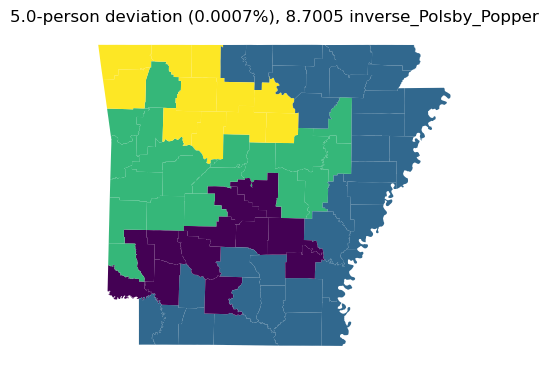

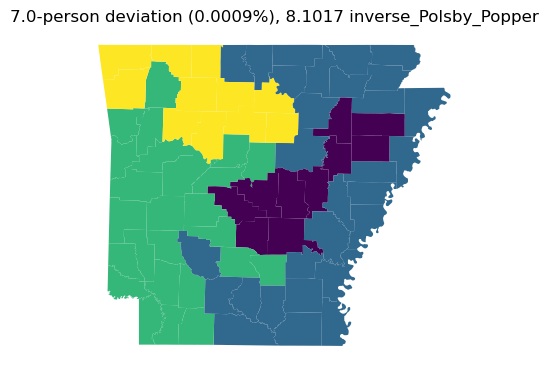

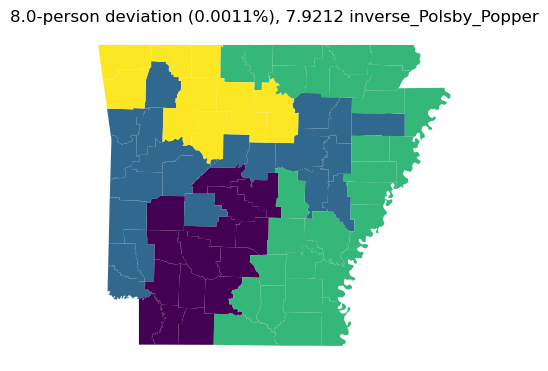

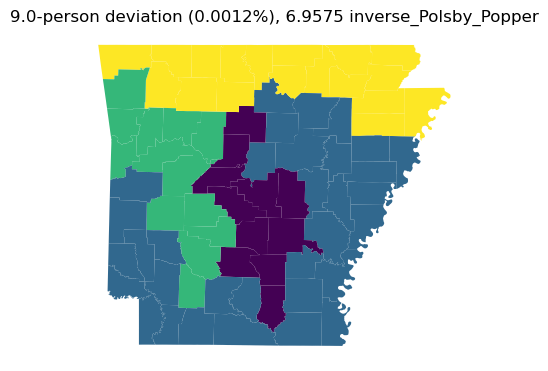

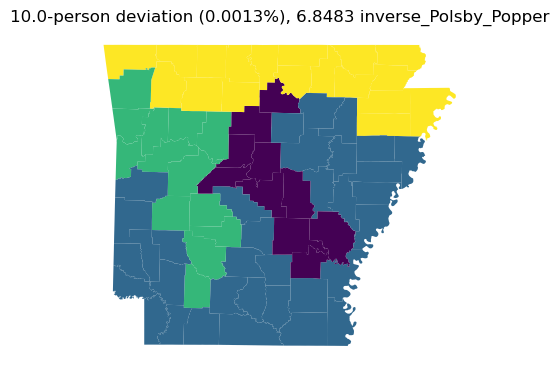

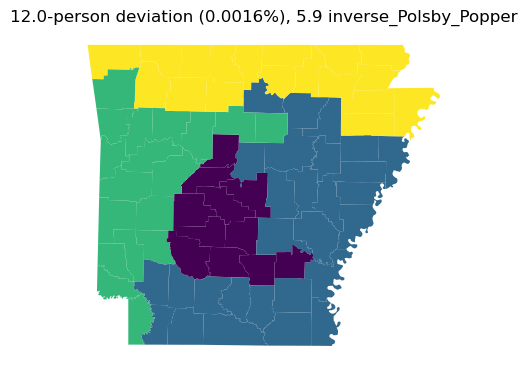

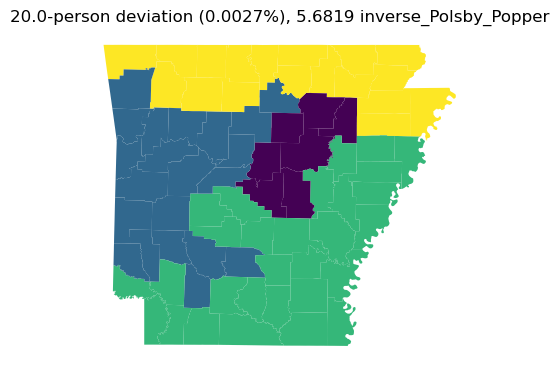

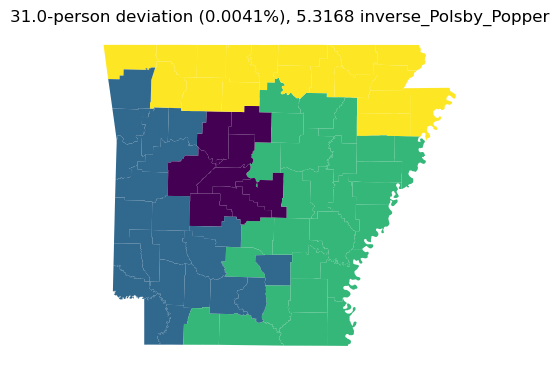

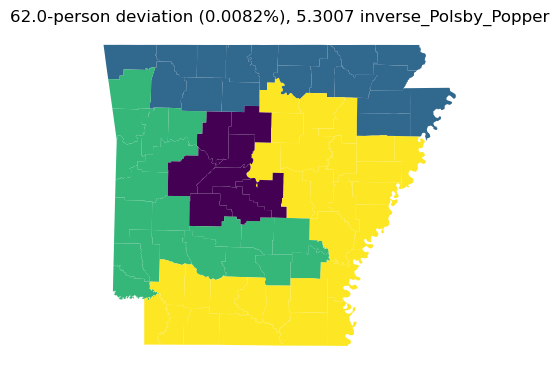

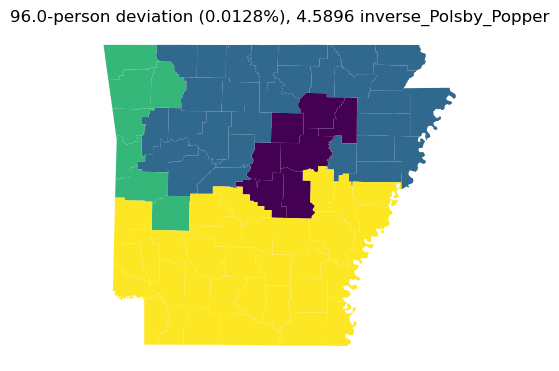

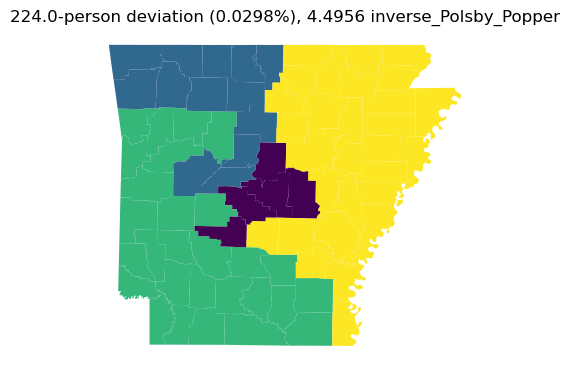

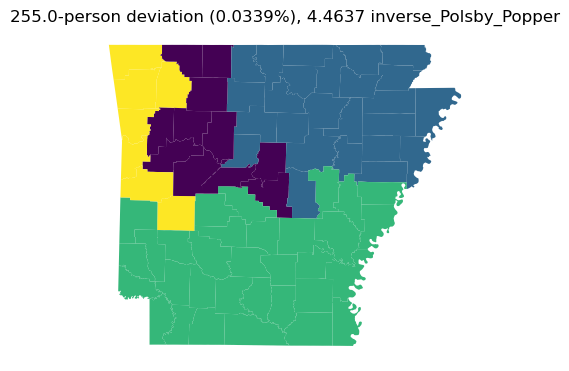

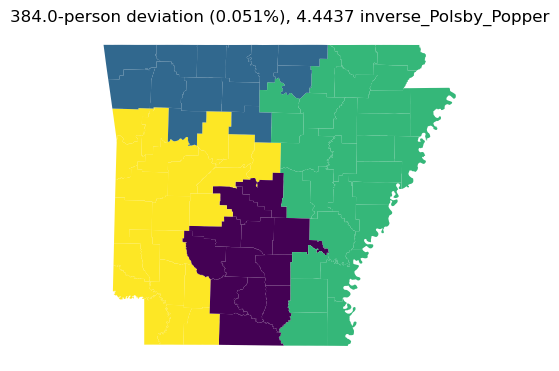

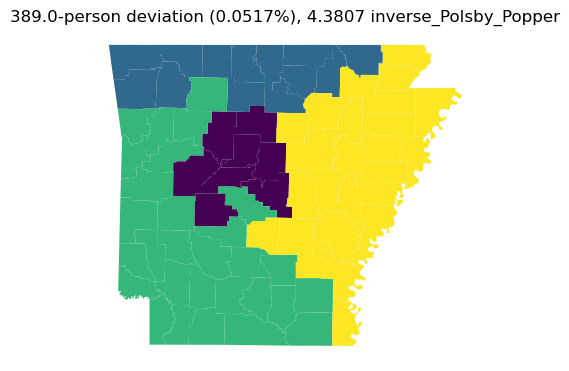

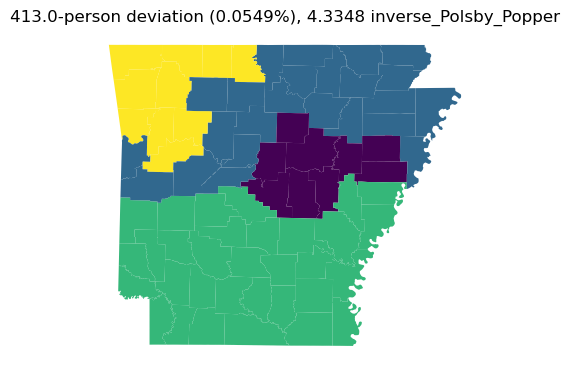

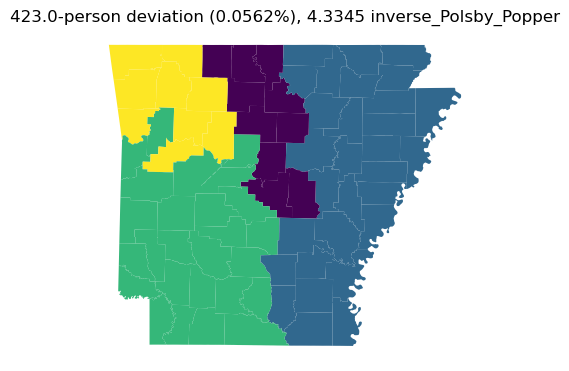

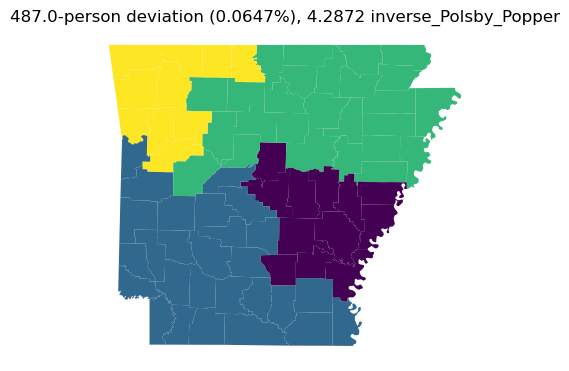

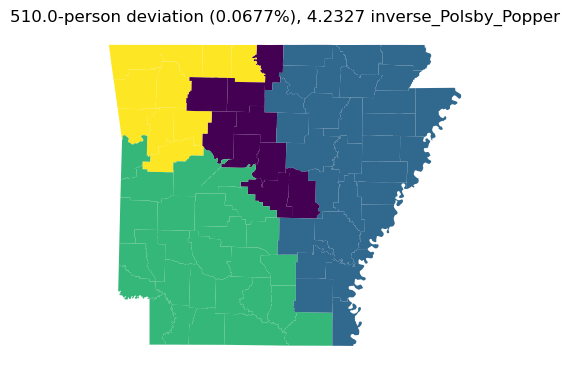

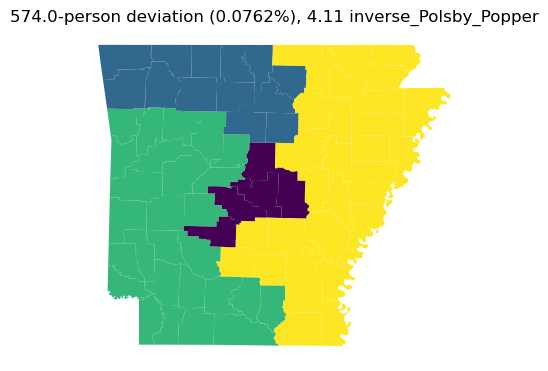

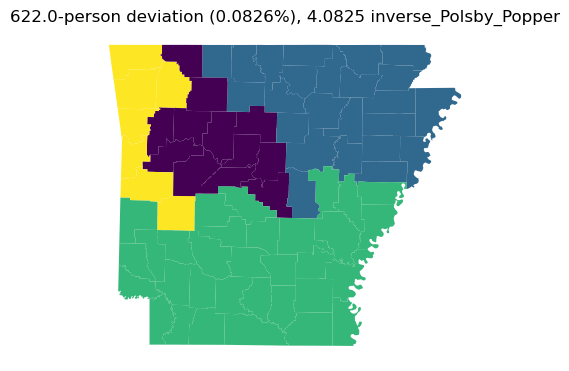

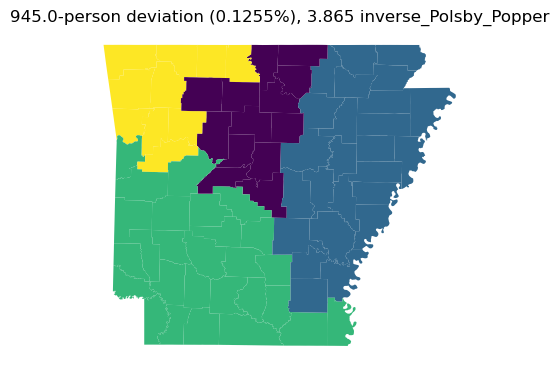

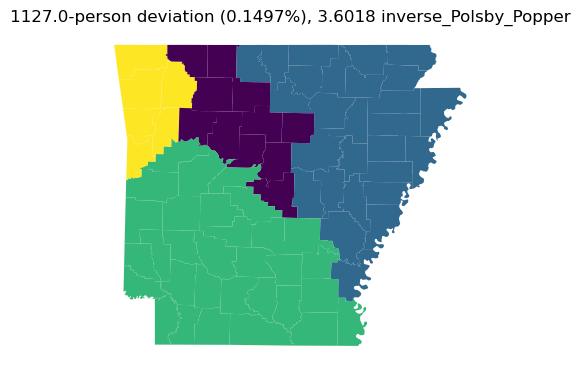

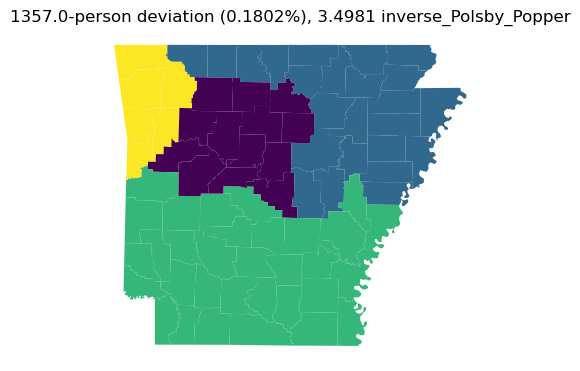

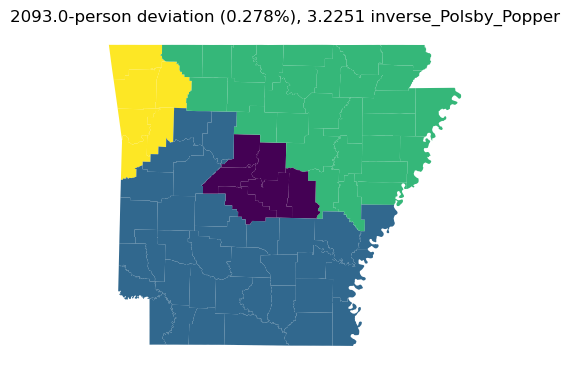

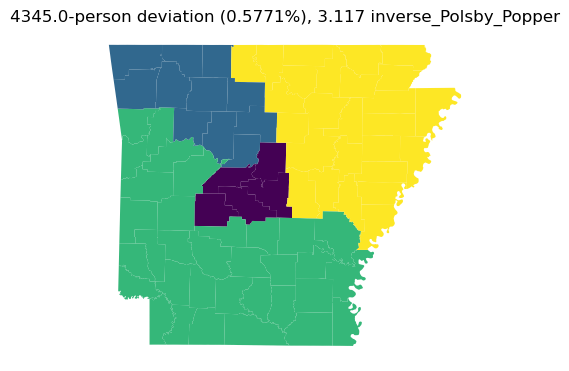

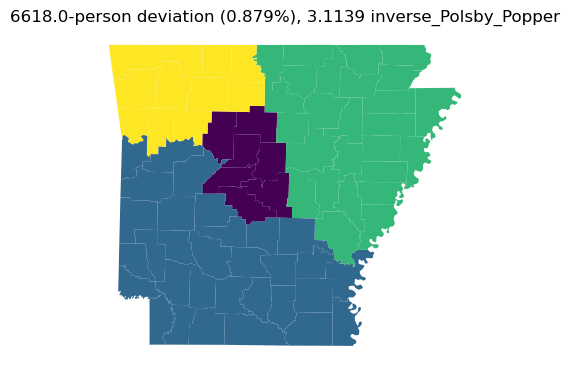

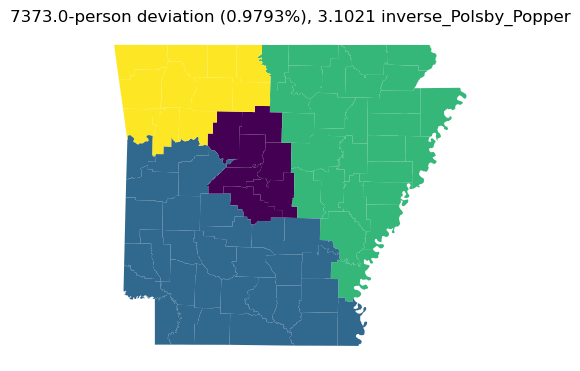

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[2.0, 0.1095210958319578], [5.0, 0.14402057592668666], [7.0, 0.15080927624513518], [8.0, 0.15488101154215422], [9.0, 0.1624288880956411], [10.0, 0.16576447812518352], [11.0, 0.16616809534058188], [12.0, 0.20418234927563847], [31.0, 0.2094328504847752], [35.0, 0.2095921092390195], [36.0, 0.21723639798933364], [49.0, 0.2308604396048412], [102.0, 0.2514839586671441], [159.0, 0.25254971869440046], [177.0, 0.2605079441117201], [223.0, 0.27519744471223573], [359.0, 0.27796603632927824], [413.0, 0.2794105534745407], [574.0, 0.28754768770100925], [948.0, 0.2889431892948975], [1127.0, 0.30989343151615656], [1357.0, 0.3153834897983385], [2093.0, 0.333669738223598], [4345.0, 0.3361508881333978], [6618.0, 0.3413040152533109], [6884.0, 0.34331933918363045], [7373.0, 0.3444692480335857]]


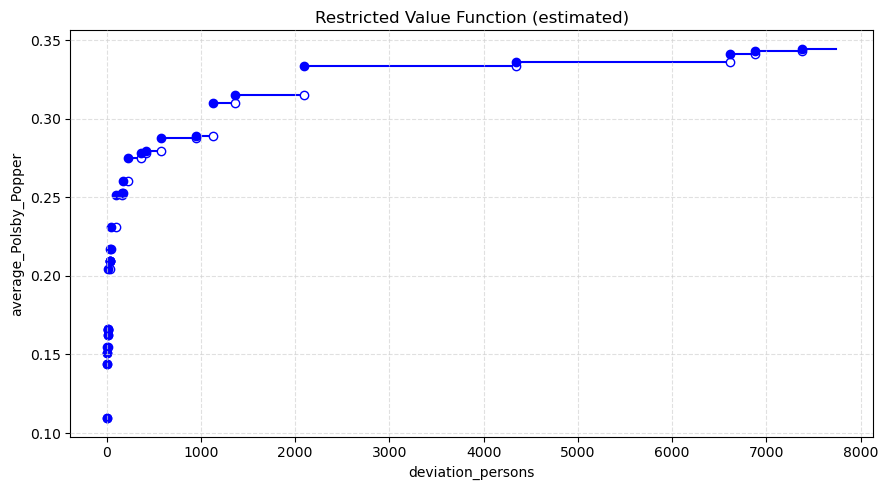

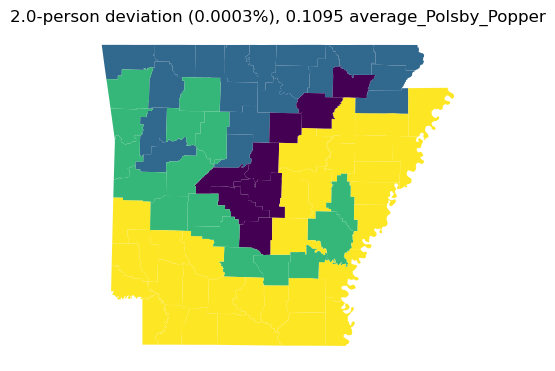

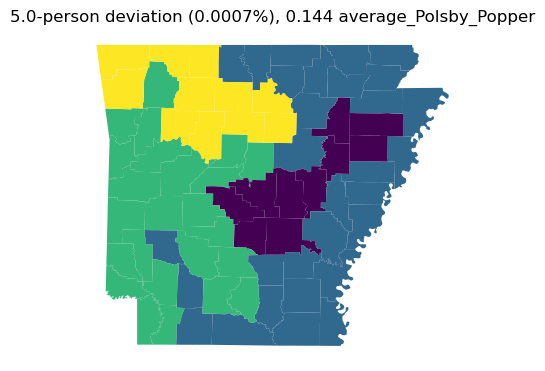

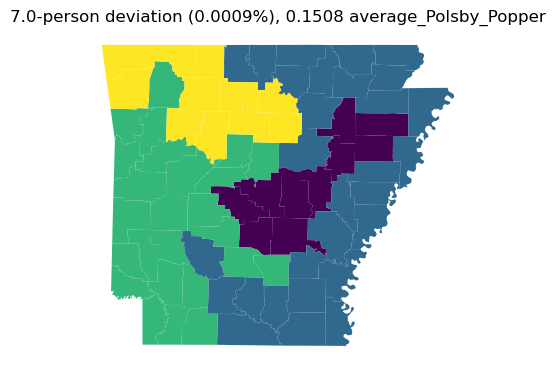

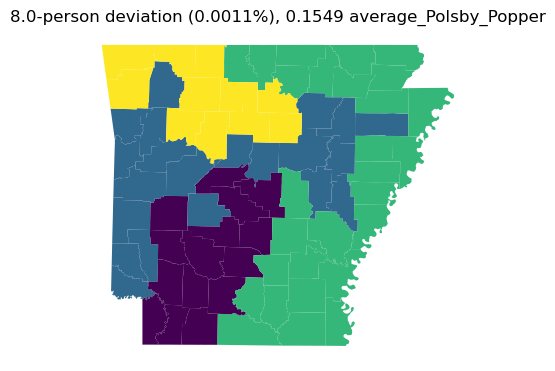

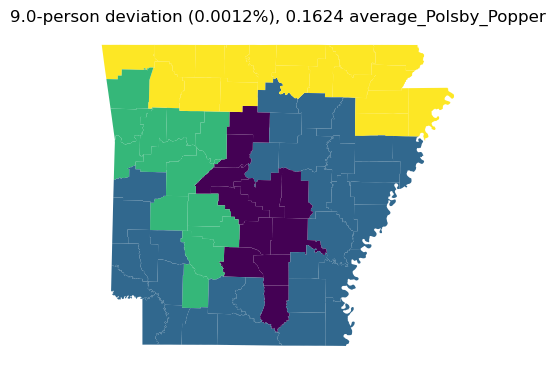

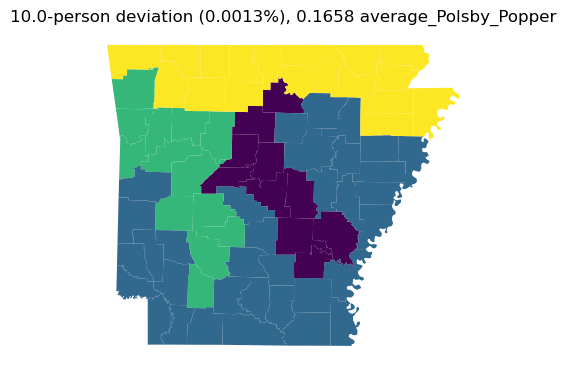

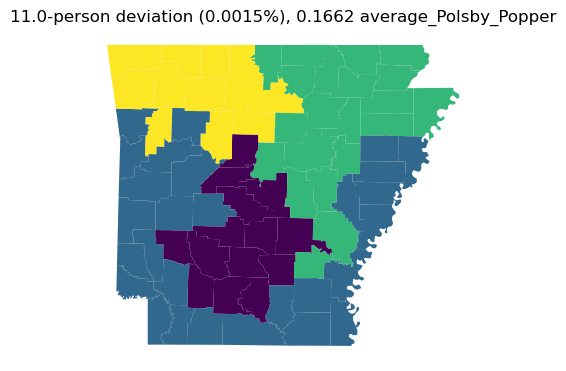

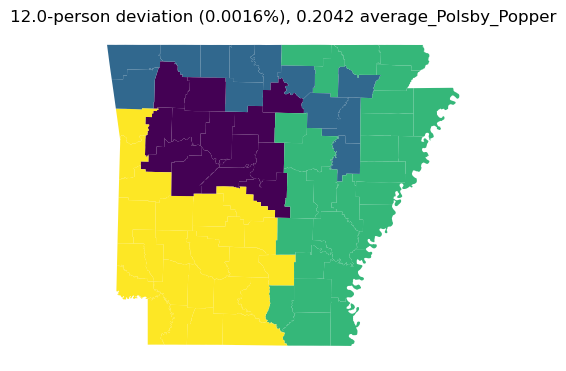

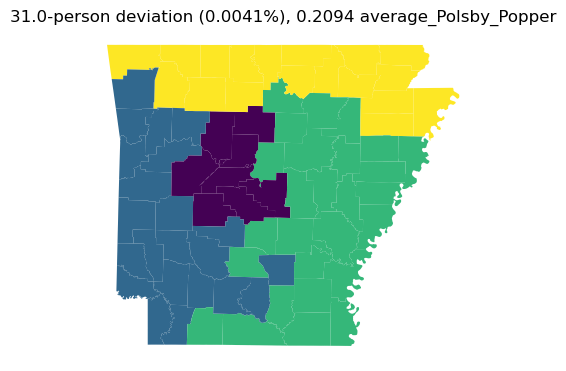

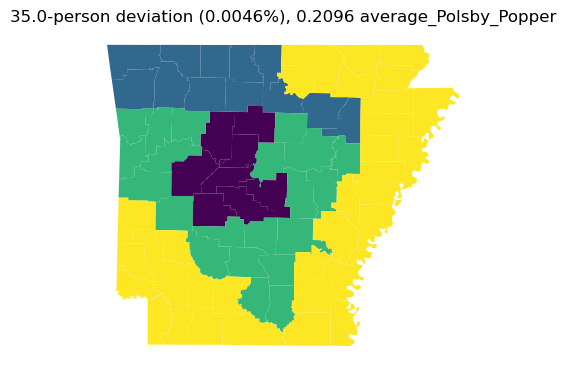

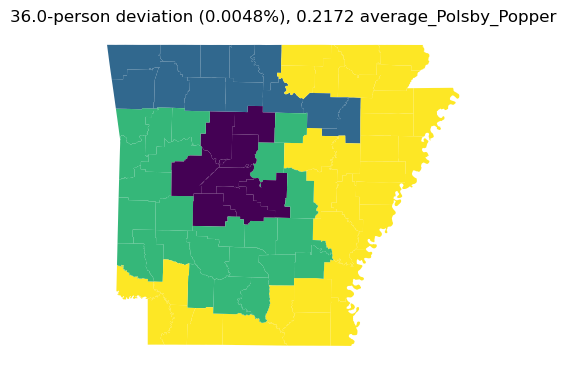

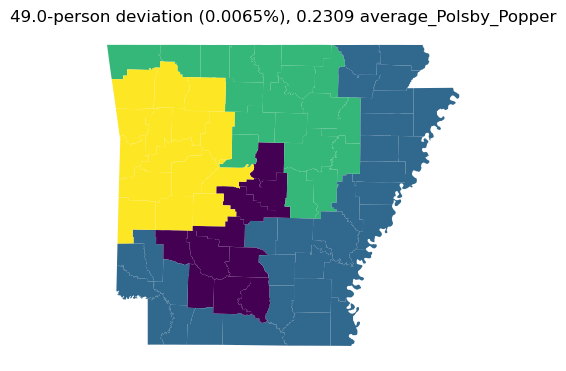

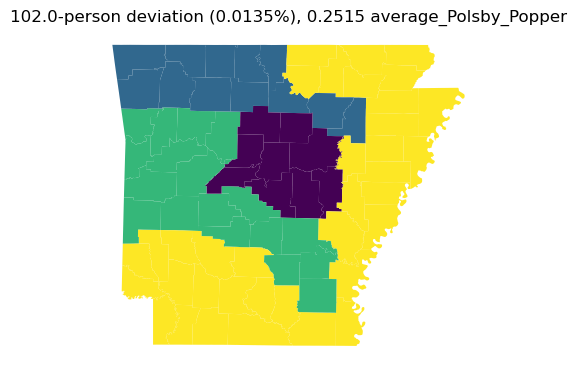

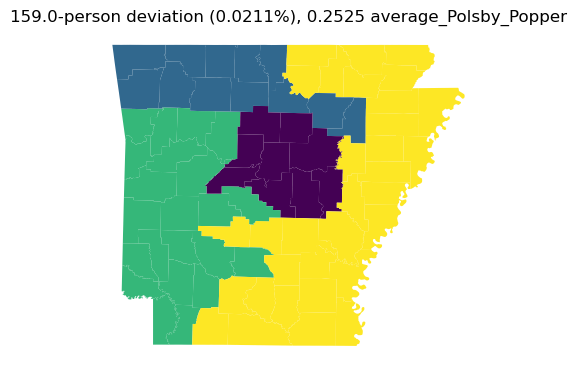

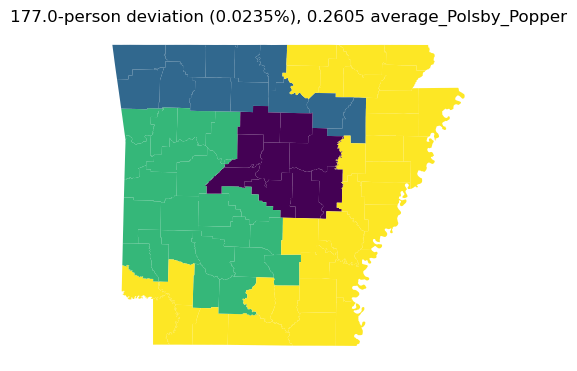

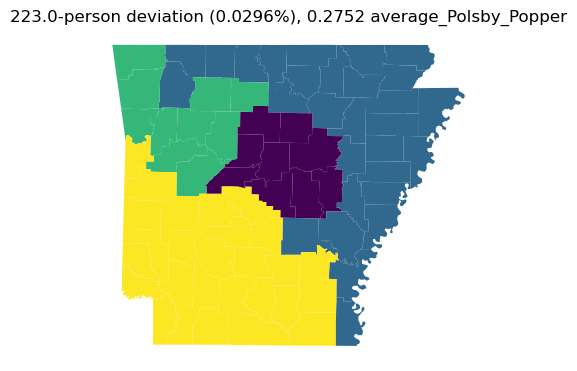

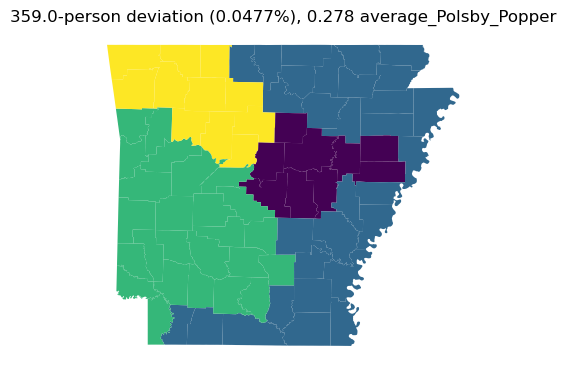

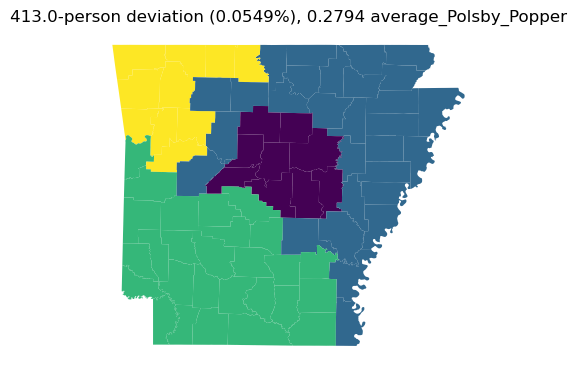

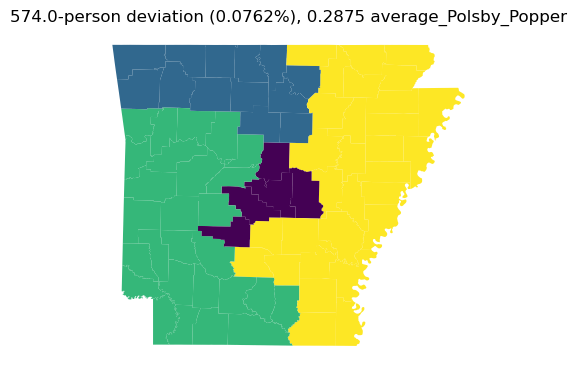

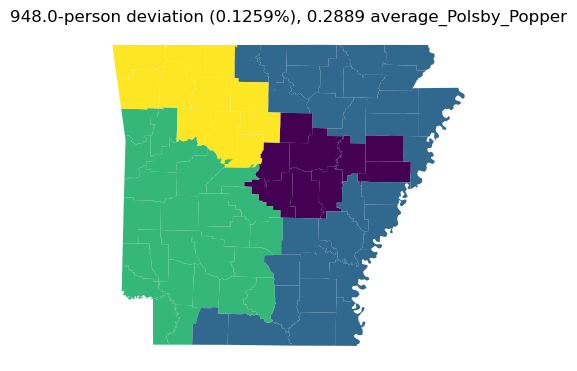

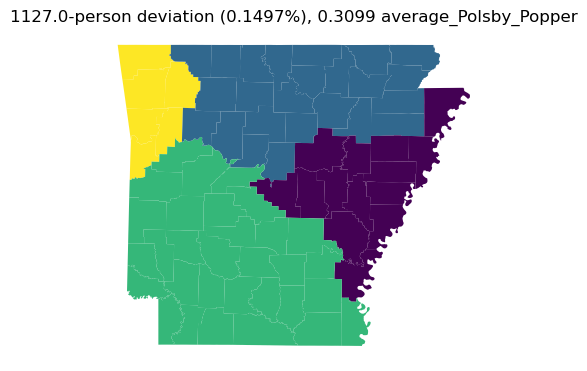

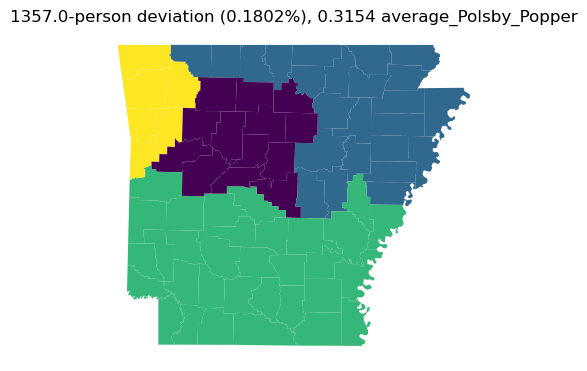

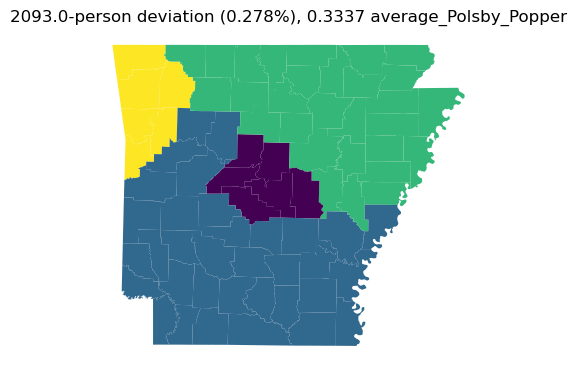

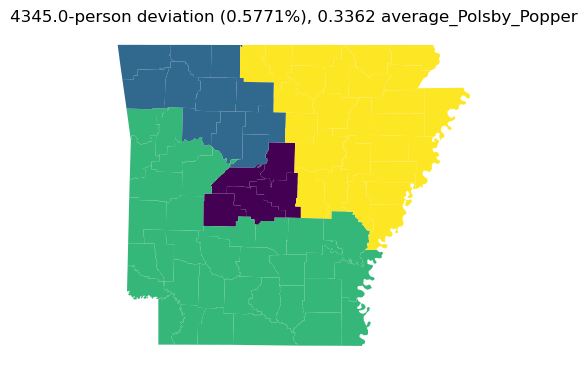

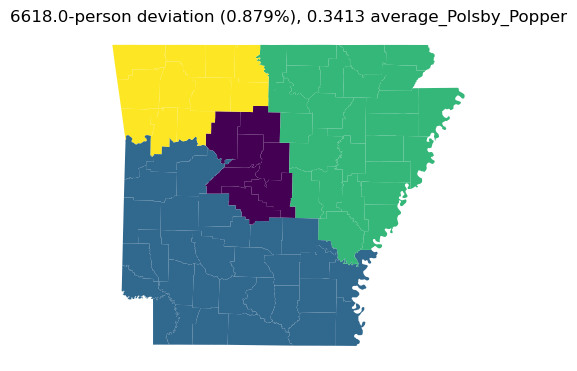

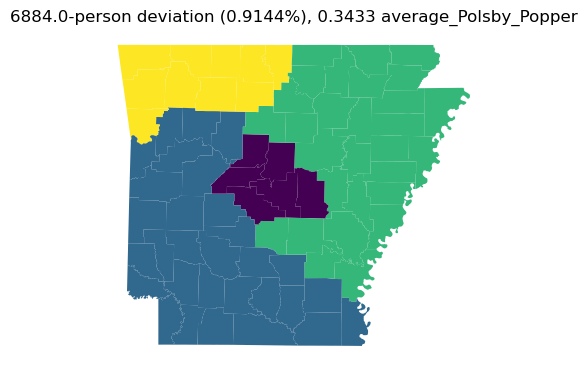

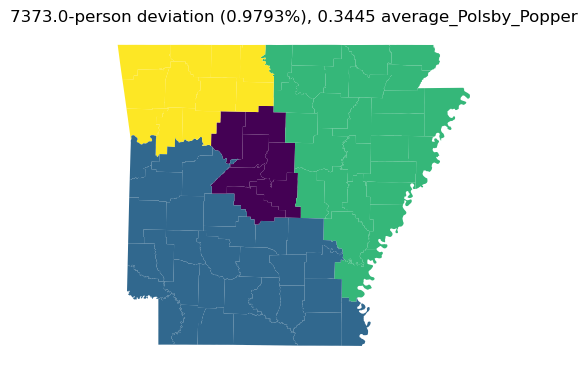

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[2.0, 0.082291244428439], [6.0, 0.09371118282449033], [7.0, 0.10214221913766813], [9.0, 0.11176278198110416], [14.0, 0.1246640711475532], [27.0, 0.13244244070175817], [35.0, 0.14231187979576543], [43.0, 0.15339864099244951], [94.0, 0.16175967322644416], [139.0, 0.16449215850097548], [162.0, 0.17927000513723867], [245.0, 0.18074495424011117], [255.0, 0.19601387024054376], [364.0, 0.2014542660697239], [622.0, 0.22501451802074723], [945.0, 0.23141303591664109], [1357.0, 0.23186353285400083], [2093.0, 0.24787431905224838], [4022.0, 0.2653742241026616], [4088.0, 0.2680740462996163]]


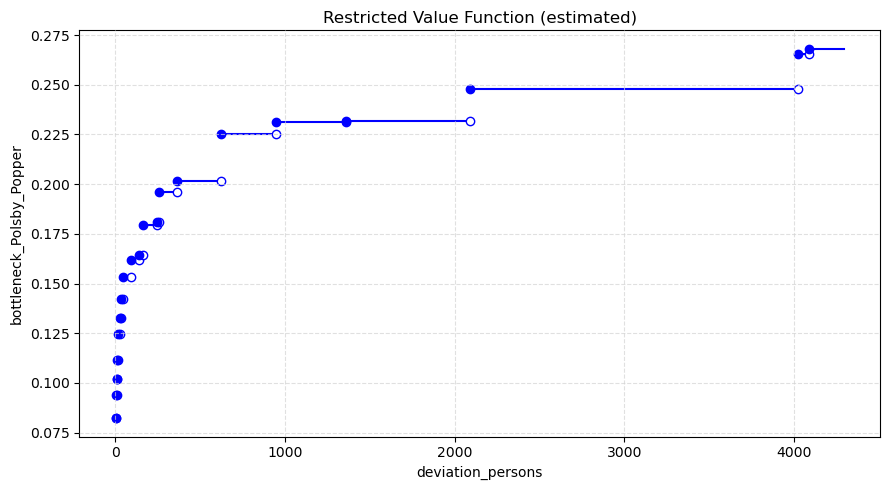

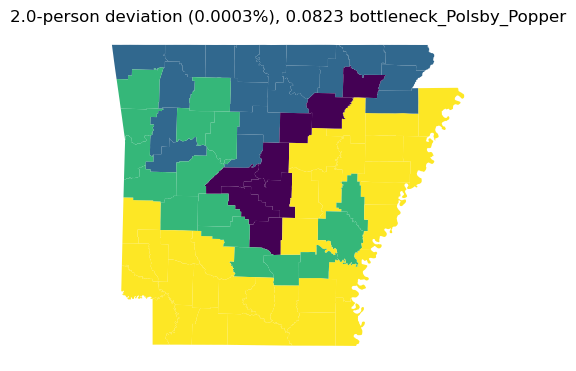

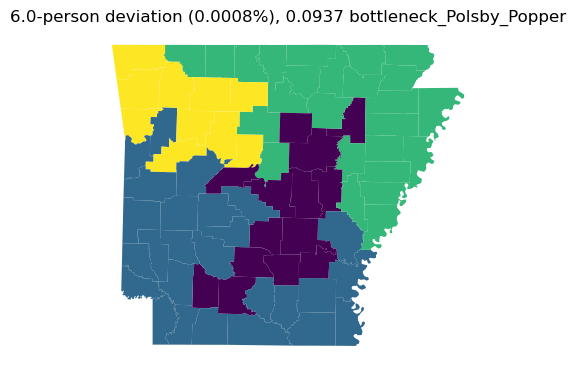

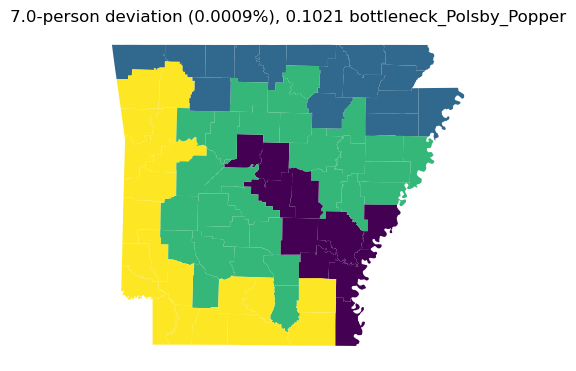

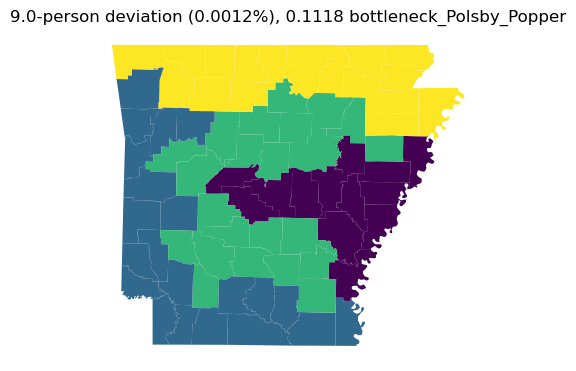

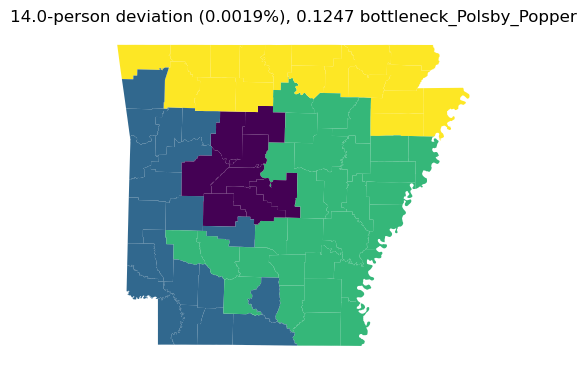

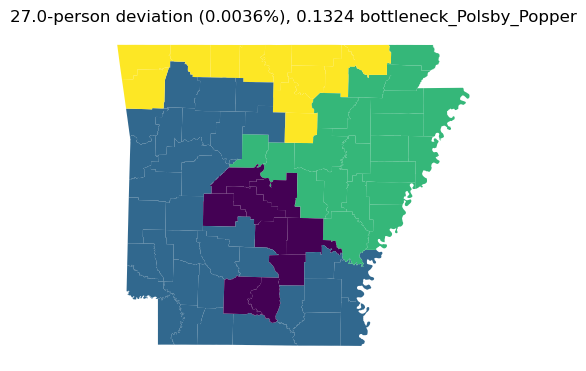

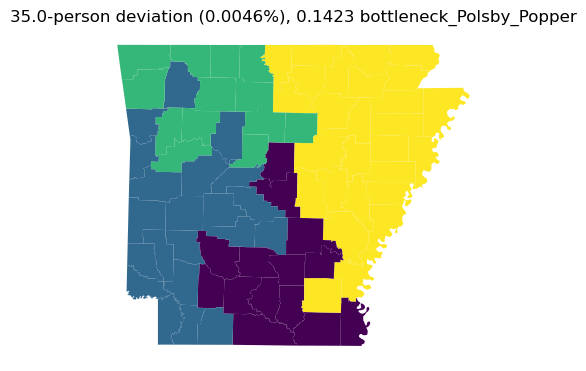

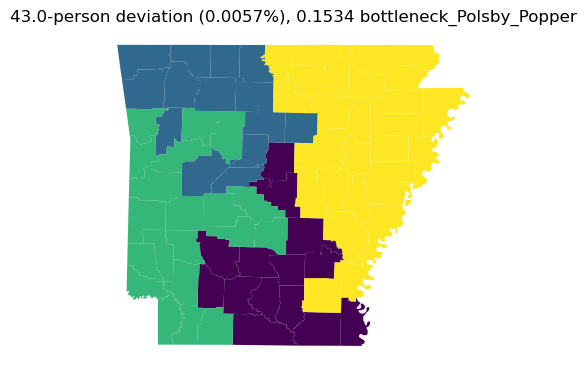

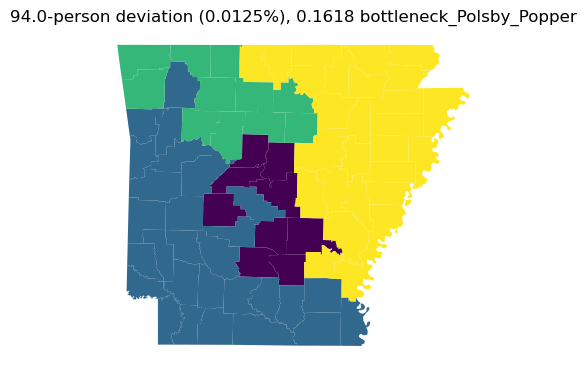

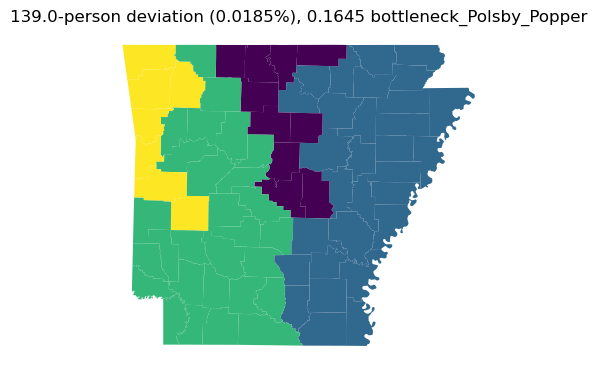

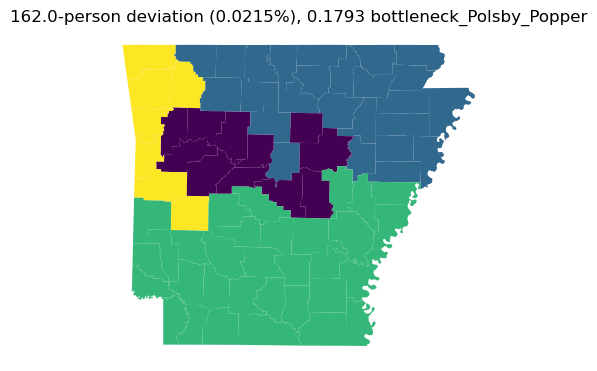

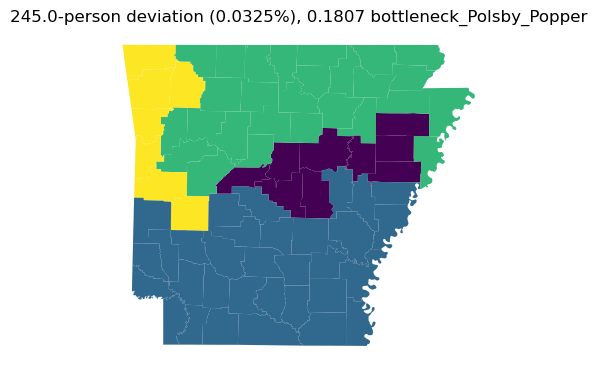

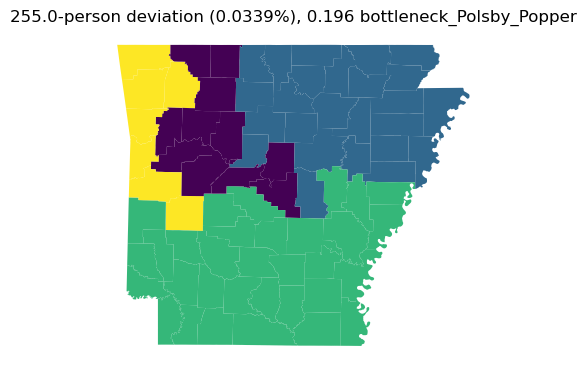

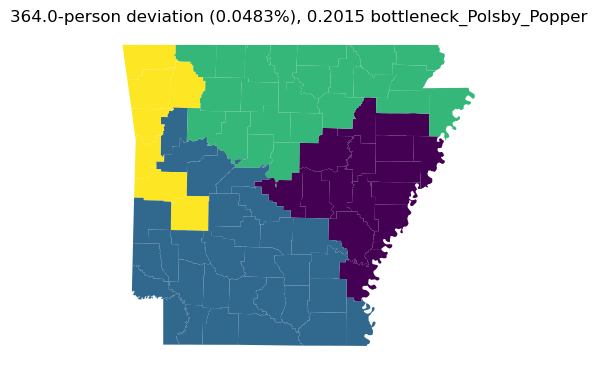

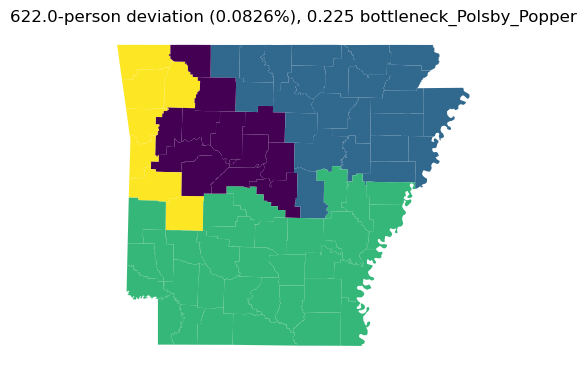

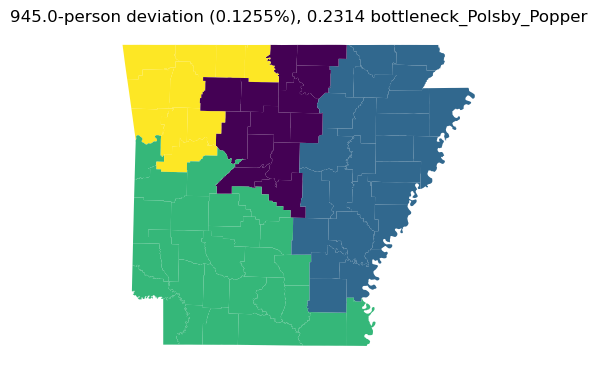

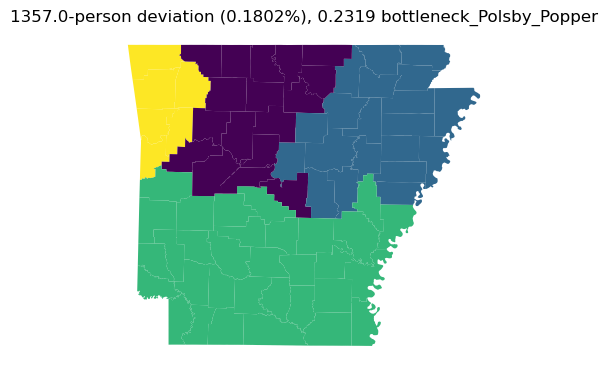

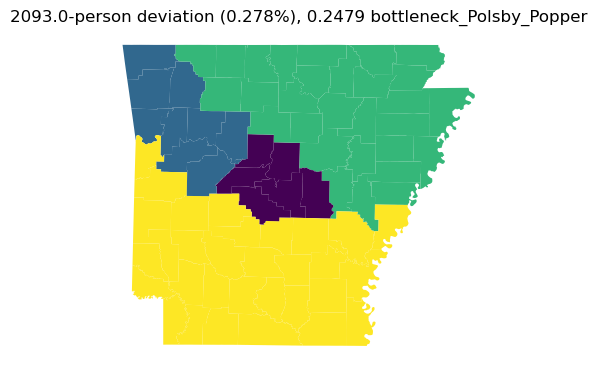

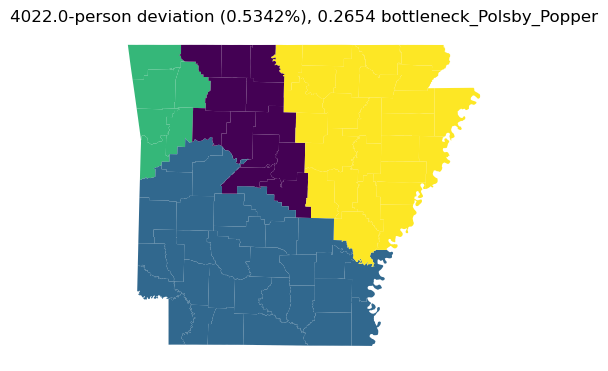

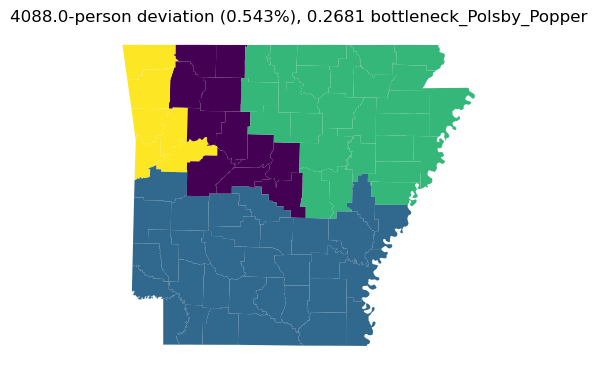

In [5]:
from pareto import ParetoFrontier
from metrics import *
from draw import draw_plan
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.shp'

# set dummy values... (because compute_obj checks plan feasibility...)
G._L = 0 
G._U = k * ideal_population
pareto = dict()

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    #print("Pareto front plans:", pareto[obj_type].plans)
    print("Pareto front objective values:", pareto[obj_type].objvals)
    
    # Set the limits accordingly
    pareto[obj_type].plot()   

    # Draw the plans from Pareto frontier
    pareto[obj_type].draw_plans()

In [6]:
print("plans =",plans)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
len(plans)

31152

In [8]:
for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    print("Pareto front plans:", pareto[obj_type].plans)

***************************************
obj_type = cut_edges
***************************************
Pareto front plans: [[[4, 20, 21, 28, 38, 43, 61, 63], [0, 3, 5, 7, 12, 13, 17, 22, 23, 31, 41, 46, 47, 50, 51, 53, 58, 59, 62], [1, 24, 25, 30, 33, 37, 49, 52, 54, 57, 60, 64, 67, 70, 71, 72], [2, 6, 8, 9, 10, 11, 14, 15, 16, 18, 19, 26, 27, 29, 32, 34, 35, 36, 39, 40, 42, 44, 45, 48, 55, 56, 65, 66, 68, 69, 73, 74]], [[2, 14, 20, 21, 28, 32, 39, 44, 56, 73], [3, 5, 8, 9, 10, 12, 13, 15, 16, 19, 25, 26, 29, 31, 33, 34, 35, 36, 38, 43, 46, 49, 57, 58, 59, 62, 65, 68, 69, 74], [0, 1, 4, 6, 11, 17, 18, 23, 24, 27, 37, 40, 42, 45, 47, 48, 54, 55, 60, 61, 64, 66, 67, 72], [7, 22, 30, 41, 50, 51, 52, 53, 63, 70, 71]], [[2, 8, 9, 15, 20, 29, 32, 33, 36, 44, 49, 57, 61, 63, 65], [3, 4, 5, 7, 10, 12, 13, 14, 16, 26, 31, 38, 39, 41, 43, 46, 50, 51, 58, 59, 62, 68, 69, 73, 74], [0, 6, 11, 18, 19, 21, 24, 25, 27, 28, 34, 35, 37, 40, 42, 45, 48, 54, 55, 56, 60, 64, 66, 67, 72], [1, 17, 22, 23, 30, 